### 2A. The following data on consumption-expenditure and income of 20 families (in ‘000 rupees):
> 1. Use GQ test to check for the presence of heteroskedasticity.
> 2. If heteroskedasticity is present, use any simple model for the error-variance to obtain better estimates of the parameters.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
data = pd.read_excel("Regression - 2 1.xlsm")
data

,Income,Con-exp
0,22.3,19.9
1,32.3,31.2
2,36.6,31.8
3,12.1,12.1
4,42.3,40.7
5,6.2,6.1
6,44.7,38.6
7,26.1,25.5
8,10.3,10.3
9,40.2,38.8


In [5]:
data1 = data.sort_values("Income")
x1 = data1["Income"]
y1 = data1["Con-exp"]
data1

,Income,Con-exp
5,6.2,6.1
10,8.1,8.0
8,10.3,10.3
3,12.1,12.1
13,14.1,13.1
14,16.4,14.8
18,18.2,17.9
19,20.1,19.8
0,22.3,19.9
15,24.1,21.6


In [6]:
x1_const = sm.add_constant(x1)
mod = sm.OLS(y1,x1_const)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Con-exp   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1263.
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           4.00e-18
Time:                        06:30:30   Log-Likelihood:                -32.785
No. Observations:                  20   AIC:                             69.57
Df Residuals:                      18   BIC:                             71.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8471      0.703      1.204      0.244      -0.631       2.325
Income         0.8993      0.025     35.534      0.000       0.846       0.952
==============================================================================
Omnibus:                        1.874   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.113
Skew:                          -0.236   Prob(JB):                        0.573
Kurtosis:                       1.945   Cond. No.                         66.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y1_pred = result.predict(x1_const)
y1_pred

resid = (y1 - y1_pred)
resid

5    -0.322865
10   -0.131582
8     0.189904
3     0.371120
13   -0.427530
14   -0.795977
18    0.685239
19    0.876522
0    -1.001992
15   -0.920777
7     1.180574
17   -1.297940
16    1.383275
1     1.304761
11    1.226247
2    -1.962335
12   -1.521390
9     1.800096
4     1.811514
6    -2.446865
dtype: float64

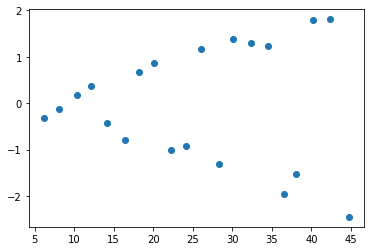

In [9]:
plt.scatter(x1,resid)

In [16]:
c = 6
smallest = data1[:7]
smallest

,Income,Con-exp
5,6.2,6.1
10,8.1,8.0
8,10.3,10.3
3,12.1,12.1
13,14.1,13.1
14,16.4,14.8
18,18.2,17.9


In [17]:
x11_const = sm.add_constant(smallest["Income"])
mod = sm.OLS(smallest["Con-exp"],x11_const)
result1 = mod.fit()
result1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Con-exp   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     315.0
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.04e-05
Time:                        06:36:44   Log-Likelihood:                -4.5833
No. Observations:                   7   AIC:                             13.17
Df Residuals:                       5   BIC:                             13.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5670      0.664      0.854      0.432      -1.140       2.274
Income         0.9172      0.052     17.747      0.000       0.784       1.050
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.035
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.405
Skew:                          -0.327   Prob(JB):                        0.817
Kurtosis:                       2.020   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y_pred1 = result1.predict(x11_const)
res1 = (smallest["Con-exp"]-y_pred1)
Res1 = res1**2
ssr1 = Res1.sum()

In [19]:
largest = data1[-7:]
largest

,Income,Con-exp
1,32.3,31.2
11,34.5,33.1
2,36.6,31.8
12,38.0,33.5
9,40.2,38.8
4,42.3,40.7
6,44.7,38.6


In [20]:
x21_const = sm.add_constant(largest["Income"])
mod = sm.OLS(largest["Con-exp"],x21_const)
result2 = mod.fit()
result2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Con-exp   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     17.10
Date:                Sun, 05 Jun 2022   Prob (F-statistic):            0.00904
Time:                        06:37:03   Log-Likelihood:                -13.646
No. Observations:                   7   AIC:                             31.29
Df Residuals:                       5   BIC:                             31.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4921      7.269      0.756      0.484     -13.195      24.179
Income         0.7791      0.188      4.135      0.009       0.295       1.263
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.865
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.765
Skew:                           0.001   Prob(JB):                        0.682
Kurtosis:                       1.380   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
y_pred2 = result2.predict(x21_const)
res2 = (largest["Con-exp"]-y_pred2)
Res2 = res2**2
ssr2 = Res2.sum()
ssr2

20.22591515394644

In [22]:
ssr1
ssr2
F_stat = ssr2/ssr1
F_stat

13.322135583472347

In [23]:
scipy.stats.f.ppf(0.95,7,7)

3.7870435399280677

Clearly, F_stat > F_crit , so the null hypothesis is rejected.
> Heteroskedasticity is present.

Submitted by,

> Soumitro Mukherjee


Reg. No. : 213001818010030, Roll No. : 30018021030